# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [4]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [7]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [9]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [12]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [14]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [17]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [19]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


#### We now find missing values and unique values in both datasets

In [22]:
client_df.isnull().sum().sort_values(ascending=False)

id                                0
channel_sales                     0
pow_max                           0
origin_up                         0
num_years_antig                   0
net_margin                        0
nb_prod_act                       0
margin_net_pow_ele                0
margin_gross_pow_ele              0
imp_cons                          0
has_gas                           0
forecast_price_pow_off_peak       0
forecast_price_energy_peak        0
forecast_price_energy_off_peak    0
forecast_meter_rent_12m           0
forecast_discount_energy          0
forecast_cons_year                0
forecast_cons_12m                 0
date_renewal                      0
date_modif_prod                   0
date_end                          0
date_activ                        0
cons_last_month                   0
cons_gas_12m                      0
cons_12m                          0
churn                             0
dtype: int64

In [24]:
price_df.isnull().sum().sort_values(ascending=False)

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

#### There are no null values in either dataset. So no imputing or null value cleaning required before mdoeling.

In [27]:
client_df.nunique().sort_values(ascending=False)

id                                14606
forecast_cons_12m                 13993
net_margin                        11965
cons_12m                          11065
imp_cons                           7752
cons_last_month                    4751
forecast_cons_year                 4218
forecast_meter_rent_12m            3528
margin_net_pow_ele                 2391
margin_gross_pow_ele               2391
date_modif_prod                    2129
cons_gas_12m                       2112
date_activ                         1796
pow_max                             698
forecast_price_energy_off_peak      516
date_renewal                        386
date_end                            368
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
num_years_antig                      13
forecast_discount_energy             12
nb_prod_act                          10
channel_sales                         8
origin_up                             6
has_gas                               2


In [29]:
price_df.nunique().sort_values(ascending=False)

id                    16096
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
price_date               12
dtype: int64

#### Unique values in each column vary widely in both datasets.  Obviously boolean columns have only 2 unique values so that's negligible.  But the rest of the numeric data varies so that could be useful information in determining causes of churn.

In [32]:
#Churn Rate Calculation
churn_rate = client_df['churn'].mean()
print(f"Overall churn rate: {churn_rate: .2%}") #return ans percentage rounded to 2 decimal places

Overall churn rate:  9.72%


#### We see that only 9.72% of clients have churned from using PowerCo

In [35]:
categorical_df = client_df.select_dtypes(include = ['object', 'bool'])
for col in categorical_df.columns:
    print(f"\nValue counts for {col}: \n")
    print(categorical_df[col].value_counts())


Value counts for id: 

id
24011ae4ebbe3035111d65fa7c15bc57    1
2fae70276cd7a4874a2aefcd68d5a184    1
a7a9dac0ffc2ad56c66a1b08d53d0e51    1
6cfbce2099a4163ea4fe422fb28829ea    1
4289e929ecd35a0754e697feb24a091b    1
                                   ..
0b69432a3ceee7763bf86ffe30c6bc2d    1
6cabca88c760284183f51f84e4a27b1e    1
de92494d7140dc94be6a1ebafaf98056    1
a8e828bfad0869527e9acdd39a36cc91    1
563dde550fd624d7352f3de77c0cdfcd    1
Name: count, Length: 14606, dtype: int64

Value counts for channel_sales: 

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

Value counts for date_activ: 

date_activ
2009-08-01    95
2010-02-01    92
2009-09-01    76
2009-10-01    55


#### We now have frequency of every unique categorical value in each categorical column.

#### From our value counts, we see that the categorical variables origin_up, has_gas, and channel_sales have the most repitition accross many rows.  This makes these variables a good candidate.

In [39]:
#Correlation of numerical features with churn
numerical_df = client_df.select_dtypes(include = ['int64', 'float64'])
churn_corr = numerical_df.corr()['churn'].sort_values(ascending = False)

print("Correlation of features with churn: \n")
print(churn_corr)

Correlation of features with churn: 

churn                             1.000000
margin_net_pow_ele                0.095772
margin_gross_pow_ele              0.095725
forecast_meter_rent_12m           0.044245
net_margin                        0.041135
pow_max                           0.030362
forecast_price_energy_peak        0.029315
forecast_discount_energy          0.017026
forecast_price_pow_off_peak       0.014778
forecast_cons_12m                 0.012949
imp_cons                         -0.001583
forecast_cons_year               -0.002558
forecast_price_energy_off_peak   -0.010837
nb_prod_act                      -0.014930
cons_gas_12m                     -0.037957
cons_last_month                  -0.045284
cons_12m                         -0.045968
num_years_antig                  -0.074140
Name: churn, dtype: float64


#### This correlation information is probably our most important step.  We have found that everything including pow_max and above are the strongest features relating to churn.  They may be the factors we put more emphasis on for visualization.

In [42]:
#Standard deviation of numeric factors to see features with most spread. 
#Higher variance = more information
feature_variance = numerical_df.std().sort_values(ascending=False)
print("Standard deviation of numeric features (highest to lowest): \n")
print(feature_variance)

Standard deviation of numeric features (highest to lowest): 

cons_12m                          573465.264198
cons_gas_12m                      162973.059057
cons_last_month                    64364.196422
forecast_cons_year                  3247.786255
forecast_cons_12m                   2387.571531
imp_cons                             341.369366
net_margin                           311.798130
forecast_meter_rent_12m               66.165783
margin_gross_pow_ele                  20.231172
margin_net_pow_ele                    20.230280
pow_max                               13.534743
forecast_discount_energy               5.108289
forecast_price_pow_off_peak            4.485988
num_years_antig                        1.611749
nb_prod_act                            0.709774
churn                                  0.296175
forecast_price_energy_peak             0.049037
forecast_price_energy_off_peak         0.024623
dtype: float64


#### Everything net_margin and above is high variance and more information

In [45]:
# Grouped churn rate by key categorical features
#Calculates the mean churn rate per group — which gives you the churn % for each category
categorical_cols = ['channel_sales', 'has_gas', 'origin_up']
for col in categorical_cols:
    churn_grouped = client_df.groupby(col)['churn'].mean().sort_values(ascending = False)
    print(f"\nChurn rate by {col}:\n")
    print(churn_grouped)


Churn rate by channel_sales:

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    0.121410
usilxuppasemubllopkaafesmlibmsdf    0.100364
ewpakwlliwisiwduibdlfmalxowmwpci    0.083987
MISSING                             0.075973
lmkebamcaaclubfxadlmueccxoimlema    0.055887
epumfxlbckeskwekxbiuasklxalciiuu    0.000000
fixdbufsefwooaasfcxdxadsiekoceaa    0.000000
sddiedcslfslkckwlfkdpoeeailfpeds    0.000000
Name: churn, dtype: float64

Churn rate by has_gas:

has_gas
f    0.100544
t    0.081856
Name: churn, dtype: float64

Churn rate by origin_up:

origin_up
lxidpiddsbxsbosboudacockeimpuepw    0.125828
ldkssxwpmemidmecebumciepifcamkci    0.083863
MISSING                             0.062500
kamkkxfxxuwbdslkwifmmcsiusiuosws    0.060084
ewxeelcelemmiwuafmddpobolfuxioce    0.000000
usapbepcfoloekilkwsdiboslwaxobdp    0.000000
Name: churn, dtype: float64


#### Customers without gas are more likely to churn, and the top churners from the other categorial data are to be aware of:
#### channel sales : foosdfpfkusacimwkcsosbicdxkicaua    0.121410
#### origin_up : lxidpiddsbxsbosboudacockeimpuepw    0.125828

In [48]:
#Binning high-correlation numeric features and comparing churn:
#margin_net_pow_ele   
client_df['margin_net_pow_ele_bin'] = pd.qcut(client_df['margin_net_pow_ele'], q=4, duplicates = 'drop')
print("Churn rate by margin_net_pow_ele_bin quartile:\n")
print(client_df.groupby('margin_net_pow_ele_bin')['churn'].mean())

#margin_gross_pow_ele   
client_df['margin_gross_pow_ele_bin'] = pd.qcut(client_df['margin_gross_pow_ele'], q=4, duplicates = 'drop')
print("Churn rate by margin_gross_pow_ele_bin quartile:\n")
print(client_df.groupby('margin_gross_pow_ele_bin')['churn'].mean())

#forecast_meter_rent_12m 
client_df['forecast_meter_rent_12m_bin'] = pd.qcut(client_df['forecast_meter_rent_12m'], q=4, duplicates = 'drop')
print("Churn rate by forecast_meter_rent_12m_bin quartile:\n")
print(client_df.groupby('forecast_meter_rent_12m_bin')['churn'].mean())

#net_margin  
client_df['net_margin_bin'] = pd.qcut(client_df['net_margin'], q=4, duplicates = 'drop')
print("Churn rate by net_margin_bin quartile:\n")
print(client_df.groupby('net_margin_bin')['churn'].mean())

#pow_max 
client_df['pow_max_bin'] = pd.qcut(client_df['pow_max'], q=4, duplicates = 'drop')
print("Churn rate by pow_max_bin quartile:\n")
print(client_df.groupby('pow_max_bin')['churn'].mean())

Churn rate by margin_net_pow_ele_bin quartile:

margin_net_pow_ele_bin
(-0.001, 14.28]    0.069201
(14.28, 21.64]     0.071643
(21.64, 29.88]     0.100741
(29.88, 374.64]    0.147415
Name: churn, dtype: float64
Churn rate by margin_gross_pow_ele_bin quartile:

margin_gross_pow_ele_bin
(-0.001, 14.28]    0.069220
(14.28, 21.64]     0.071643
(21.64, 29.88]     0.100741
(29.88, 374.64]    0.147374
Name: churn, dtype: float64
Churn rate by forecast_meter_rent_12m_bin quartile:

forecast_meter_rent_12m_bin
(-0.001, 16.18]     0.091232
(16.18, 18.795]     0.084569
(18.795, 131.03]    0.096923
(131.03, 599.31]    0.115978
Name: churn, dtype: float64
Churn rate by net_margin_bin quartile:

net_margin_bin
(-0.001, 50.712]       0.093647
(50.712, 112.53]       0.091482
(112.53, 243.098]      0.094495
(243.098, 24570.65]    0.108981
Name: churn, dtype: float64
Churn rate by pow_max_bin quartile:

pow_max_bin
(3.299, 12.5]       0.089644
(12.5, 13.856]      0.086007
(13.856, 19.172]    0.099575
(1

C:\Users\tovar\AppData\Local\Temp\ipykernel_14604\430948287.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(client_df.groupby('margin_net_pow_ele_bin')['churn'].mean())
C:\Users\tovar\AppData\Local\Temp\ipykernel_14604\430948287.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(client_df.groupby('margin_gross_pow_ele_bin')['churn'].mean())
C:\Users\tovar\AppData\Local\Temp\ipykernel_14604\430948287.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ado

#### Above we used binning in the most prominent numerical variables we found in an earlier step to find which quartile contains the most churn.  We found that :
#### For margin_net_pow_ele_bin, margin_gross_pow_ele_bin, forecast_meter_rent_12m_bin,  net_margin_bin, pow_max_bin, their fourth quartiles have the highest churn rates.

### Feature Shortlist

##### After our analysis we are now able to finalize which factors contribute most to customer churn.  

    *`margin_net_pow_ele`
    *`margin_gross_pow_ele`
    *`forecast_meter_rent_12m`
    *`net_margin`
    *`pow_max`
    *`has_gas`             
    *`channel_sales`       
    *`origin_up`

In [54]:
# Final shortlist of useful features based on correlation and EDA
feature_shortlist = ['margin_net_pow_ele', 'margin_gross_pow_ele', 'forecast_meter_rent_ele_12m', 'net_margin', 'pow_max', 'has_gas', 'channel_sales', 'origin_up']
print("Final feature shortlist for churn modeling:\n")
print(feature_shortlist)

Final feature shortlist for churn modeling:

['margin_net_pow_ele', 'margin_gross_pow_ele', 'forecast_meter_rent_ele_12m', 'net_margin', 'pow_max', 'has_gas', 'channel_sales', 'origin_up']


##### The margin, meter rent, and power have strong numerical separation and high correlation, indicating that they are relevant and have the most valuable information relating to client churn.  We can use these factors in logistic reression, random forest, gradient boosting, among many other options.

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [58]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

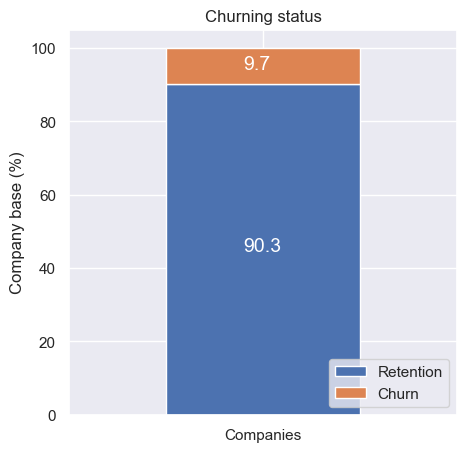

In [61]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

In [64]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

In [66]:
sns.set(style = "darkgrid", palette = 'pastel', font_scale = 1.1)
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10

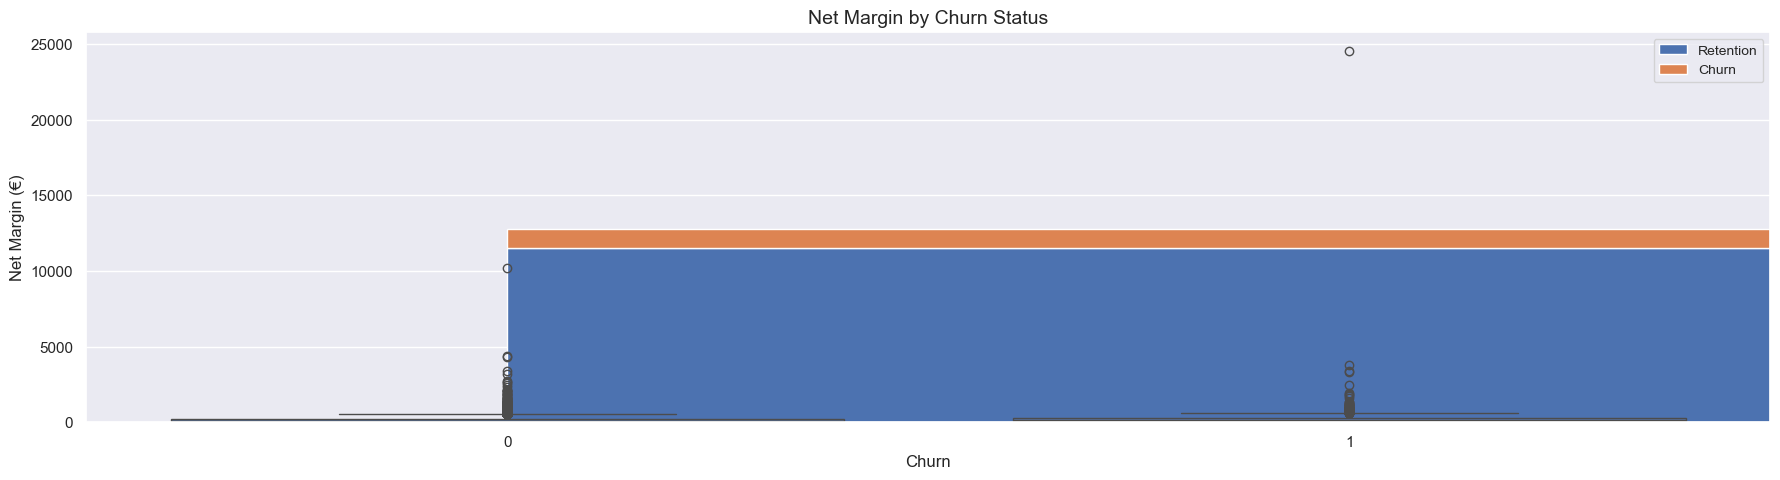

In [68]:
#Boxplot : Net Margin vs Churn
sns.boxplot(x = 'churn', y = 'net_margin', data = client_df)
plt.title("Net Margin by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Net Margin (€)")
plt.tight_layout()
plt.show()

##### This graph shows that there isn't much difference between churners and non-churners despite profit earned from the client. However, earlier in our descriptive statistics when we binned the quartiles for our high correlation numerical variables, we found that the 4th quartile had the highest percentage of churners.  This is indicated with the outliers at the 25000 mark in the graph above in the churn(1) box plot.

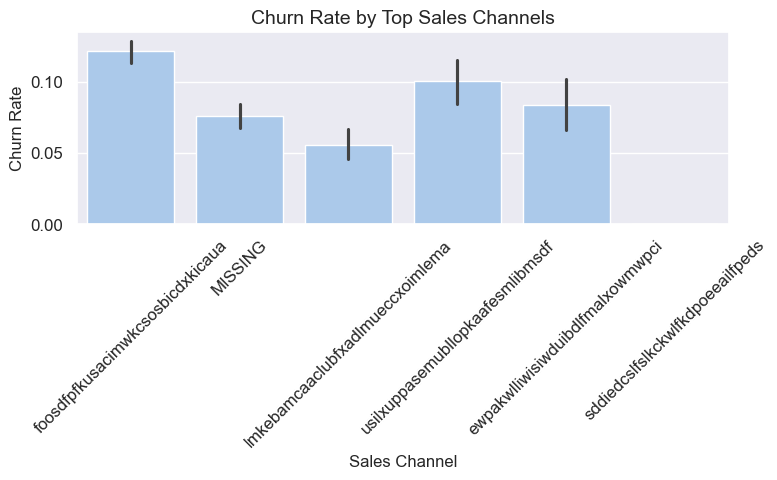

In [71]:
import numpy as np
#Barplot: Churn Rate by Sales Channel
top_channels = client_df['channel_sales'].value_counts().nlargest(6).index
filtered_df = client_df[client_df['channel_sales'].isin(top_channels)]

sns.barplot(x = 'channel_sales', y = 'churn', data = filtered_df, estimator = np.mean)
plt.title("Churn Rate by Top Sales Channels")
plt.xlabel("Sales Channel")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### We see above that the churn rate by sales channel descends in the same order that our categorical grouping revealed:

*`Churn rate by channel_sales:`

*`foosdfpfkusacimwkcsosbicdxkicaua    0.121410`
*`usilxuppasemubllopkaafesmlibmsdf    0.100364`
*`ewpakwlliwisiwduibdlfmalxowmwpci    0.083987`
*`MISSING                             0.075973`
*`lmkebamcaaclubfxadlmueccxoimlema    0.055887`
*`epumfxlbckeskwekxbiuasklxalciiuu    0.000000`
*`fixdbufsefwooaasfcxdxadsiekoceaa    0.000000`
*`sddiedcslfslkckwlfkdpoeeailfpeds    0.000000`

##### Our top churning sales channels arefoosdfpfkusacimwkcsosbicdxkicaua, usilxuppasemubllopkaafesmlibmsdf, and ewpakwlliwisiwduibdlfmalxowmwpci


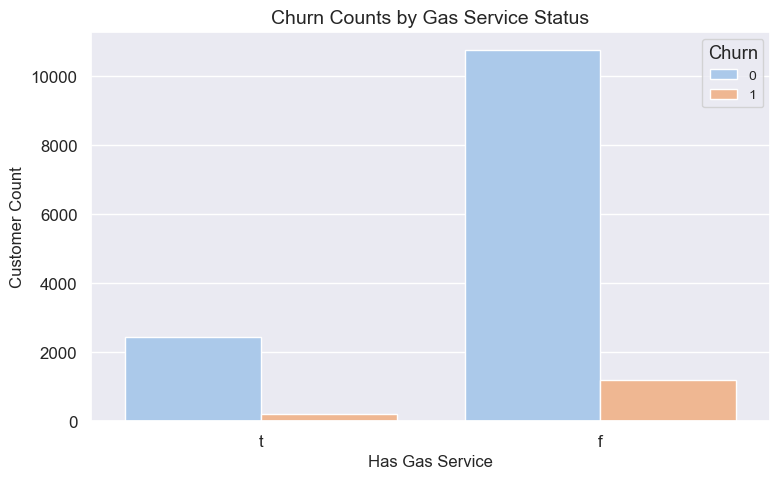

In [74]:
#Countplot: Has Gas vs Churn
sns.countplot(x = 'has_gas', hue = 'churn', data = client_df)
plt.title("Churn Counts by Gas Service Status")
plt.xlabel("Has Gas Service")
plt.ylabel("Customer Count")
plt.legend(title = "Churn")
plt.tight_layout()
plt.show()

##### We can conclude from the above that clients who don't have gas service are more likely to churn.

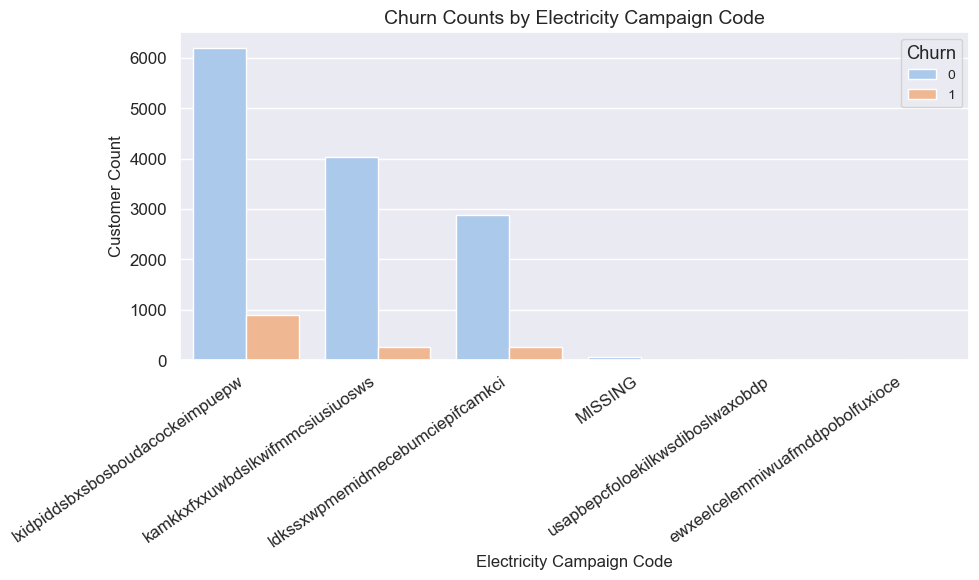

In [77]:
# Countplot for origin_up vs churn
plt.figure(figsize=(10, 6))  # Wider plot for spacing

sns.countplot(x='origin_up', hue='churn', data=client_df)
plt.title("Churn Counts by Electricity Campaign Code")
plt.xlabel("Electricity Campaign Code")
plt.ylabel("Customer Count")
plt.xticks(rotation=35, ha='right')  
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


##### Our top churning electricity campaign codes are lxidpiddsbxsbosboudacockeimpuepw and ldkssxwpmemidmecebumciepifcamkci   

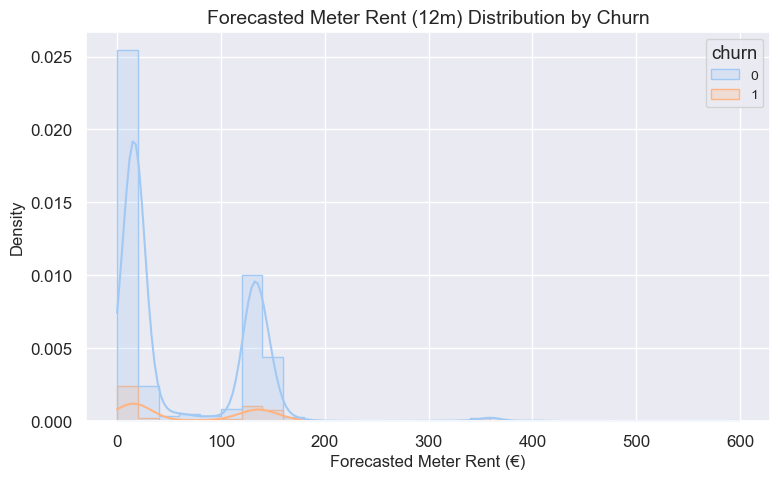

In [80]:
sns.histplot(data=client_df, x='forecast_meter_rent_12m', hue='churn', bins=30,
             kde=True, element="step", stat="density", palette="pastel")
plt.title("Forecasted Meter Rent (12m) Distribution by Churn")
plt.xlabel("Forecasted Meter Rent (€)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


##### Customers who are forecasted to pay higher meter rent are more likely to churn. 
##### This dataset is a little biased in that churners overall is just 9.7% of the data set as well.  so, it would make sense that our orange peak is smaller than the blue peak.  The bigger blue peak at lower meter rents shows that non churners pay less which indicates that churners are the ones that are forecasted to pay more.

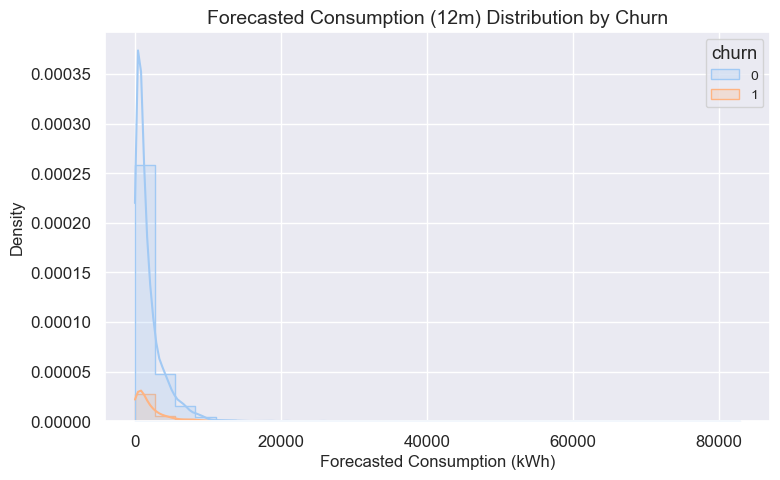

In [94]:
sns.histplot(data=client_df, x='forecast_cons_12m', hue='churn', bins=30, kde=True, element="step", stat="density")
plt.title("Forecasted Consumption (12m) Distribution by Churn")
plt.xlabel("Forecasted Consumption (kWh)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

#### Heavy right skew with majority of customers consuming relatively low energy.  Small number high usage outliers may stretch the tail and require treatment for modeling. 

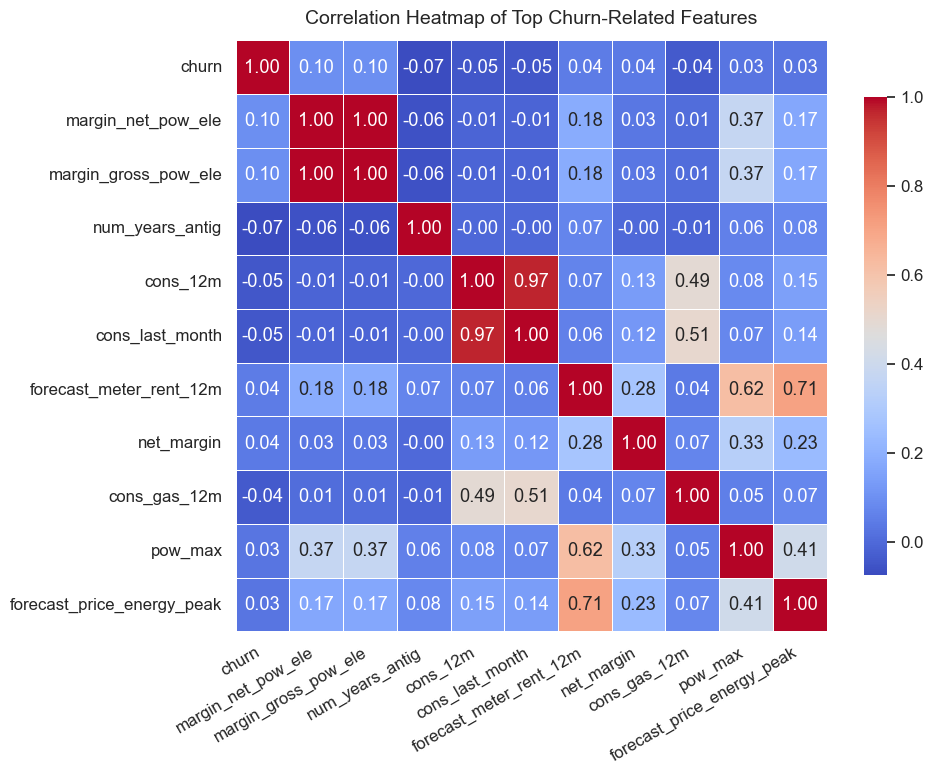

In [83]:
corr_matrix = client_df.corr(numeric_only=True)
top_corr_cols = corr_matrix['churn'].abs().sort_values(ascending=False).head(11).index
top_corr_df = client_df[top_corr_cols]

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title("Correlation Heatmap of Top Churn-Related Features", fontsize=14, pad=12)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### The results of both the numerical correlation output and the heatmap visualization consistently identify the same set of features as most strongly associated with customer churn. The top features correlated with churn include:
*`margin_net_pow_ele`
*`margin_gross_pow_ele`
*`forecast_meter_rent_12m`
*`net_margin`
*`pow_max`
##### These features show the strongest linear relationships with churn among all numeric variables in the dataset. These aligned results give us high confidence in the consistency and reliability of our findings.  They will serve as key inputs for feature selection in the churn prediction model for PowerCo.

C:\Users\tovar\AppData\Local\Temp\ipykernel_14604\1675113732.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='churn', y='margin_net_pow_ele', data=client_df, inner='quartile', palette='Set2')


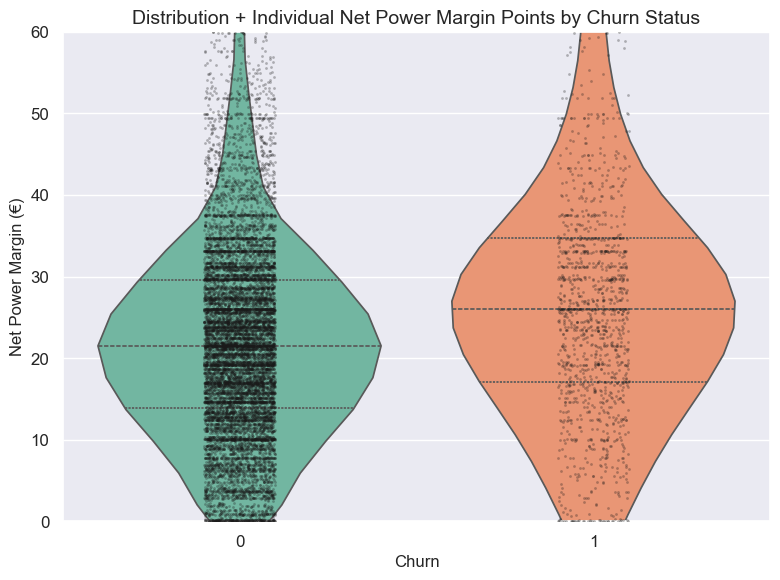

In [86]:
#Violin Plot of margin_net_pow_ele by Churn
plt.figure(figsize=(8, 6))

sns.violinplot(x='churn', y='margin_net_pow_ele', data=client_df, inner='quartile', palette='Set2')

# Strip plot for point scatter (individual customers)
sns.stripplot(x='churn', y='margin_net_pow_ele', data=client_df,
              jitter=True, size=2, color='k', alpha=0.3)

plt.title("Distribution + Individual Net Power Margin Points by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Net Power Margin (€)")
plt.ylim(0, 60)  
plt.tight_layout()
plt.show()


##### While the density distributions of churners and non churners is the same, given the violin plot shapes, we can se with the overlaying strip plot that that higher the net power margin, the higher the churn rate.  This is visible even in the non churners violin plot.  The higher the price the narrower the density or non churners, meaning that they churn.

# 📊 Executive Summary: Churn Analysis for PowerCo

---

## 📈 Churn Overview
- The overall churn rate in the dataset is 9.7%, indicating that ~1 in 10 customers leave the service.
- This class imbalance is important to consider when interpreting distributions and visualizations. Many features show subtle but meaningful differences between churned and non-churned customers.

---

## 🔍 Top Factors Correlated with Churn

Based on both the correlation matrix and numerical analysis, the following features emerged as most associated with churn:

- `margin_net_pow_ele`
- `margin_gross_pow_ele`
- `forecast_meter_rent_12m`
- `net_margin`
- `pow_max`

These variables consistently ranked at the top of the correlation list and revealed important patterns in distributional analysis.

---

## 🧪 Key Insights from Feature Exploration

### 📦 High-Margin Customers Are More Likely to Churn
- Violin and box plots (with strip overlays) showed that churned customers had slightly higher net power margins than those who stayed.
- Non-churners are concentrated in lower margin ranges, while churners are spread more evenly and appear frequently in higher margin brackets.
- Interpretation: Highly profitable customers may churn due to perceived lack of value, dissatisfaction, or pricing concerns — despite being the most valuable segment.

### 💸 Forecasted Meter Rent is a Strong Churn Signal
- Distribution plots show that non-churners are heavily concentrated at low meter rent levels (< €50).
- Churners are more evenly spread across medium and high rent levels, including €100+.
- Despite the class imbalance, churners are overrepresented in high rent brackets.
- Interpretation: Higher fixed meter costs may be driving dissatisfaction, especially for price-sensitive or high-usage customers.

### ⚡ Power Capacity Usage (pow_max) Shows Risk
- `pow_max` was moderately correlated with churn and visually confirmed via distribution analysis.
- Churned customers skewed slightly toward higher capacity usage.
- Interpretation: These may be industrial, commercial, or large-scale users who churn if service or pricing doesn't match their scale.

### 🔁 Churn Varies by Acquisition and Sales Channel
- Categorical analysis found clear churn rate differences by `channel_sales` and `origin_up`.
  - Some channels saw churn rates above 12%, while others were near 0%.
- Interpretation: Certain sales pipelines and marketing sources may generate lower-quality or poorly matched customers — an opportunity for targeting and process refinement.

### 🔥 Bundled Services Help Retention
- Customers with gas service (`has_gas = t`) churned at ~8.2%, compared to 10.1% without gas.
- Interpretation: Bundled utility services likely increase stickiness and perceived value, reducing churn.

---

## 🧠 Nuanced Considerations
- Churners are a minority, so visual comparisons (like histograms and density plots) must be interpreted with care.
- Even subtle shifts in distribution — when consistent across multiple views — can offer strong predictive signals.
- Feature interactions, such as high meter rent and high margin, may be especially valuable in future modeling.
- Small number high usage outliers may stretch the tail and require treatment for modeling.  While the curve is smaller due to class imbalance, it extends deeper into high consumption values, suggesting that high-usage customers are more likely to churn - a potential churn signal.

---

## 🛠️ Feature Recommendations for Modeling

**Numerical Features:**
- `margin_net_pow_ele`
- `margin_gross_pow_ele`
- `forecast_meter_rent_12m`
- `net_margin`
- `pow_max`
- `forecast_cons_12m`

**Categorical Features:**
- `channel_sales`
- `origin_up`
- `has_gas`

These features were selected based on:
- Correlation with churn
- Clear separation in group distributions
- Strategic value to the business

---

## 📌 Business Implications

- PowerCo is currently losing many of its most profitable customers— a significant strategic risk.
- Customers with higher forecasted meter rent and power capacity are more likely to churn, especially if not bundled with gas.
- Certain sales and acquisition channels may contribute disproportionately to churn and warrant targeted improvement or filtering.
- Retention initiatives should prioritize high-margin customers, promote bundled service offerings, and improve pricing transparency, particularly regarding meter rent.

